## Session 01: Linear Regression

In [2]:
import numpy as np
import pandas as pd

In [3]:
np.random.seed(42)

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

We'll use the wine quality data for this notebook

### Univariate Linear Regression

This is basically linear regression with 1 predictor variable.

Model:   
$y = \theta_0 + \theta_1 x$

There are two ways to fit a linear regression model, depending on the number of features. For a smaller number of features (say <10k), you can use the Normal equation form to solve for $\theta$ directly.

For more than 10k features, you probably want to use gradient descent.

Assuming that we write the model in matrix form as:

$y = \Theta^T X$,

where $\Theta, X \in \mathbb{R}^{n}$,

The Normal equation is given by:

$\theta = (X^T X)^{-1} X^T y$

In [5]:
cars = np.genfromtxt('cars.csv', delimiter=',', names=True)

In [6]:
x0 = np.ones(len(cars)) # Models the intercept
x = cars['speed']

In [7]:
X = np.array([x0, x]).T
y = cars['dist']

In [8]:
theta = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X)), X.T), y)

In [9]:
theta

array([-17.57909489,   3.93240876])

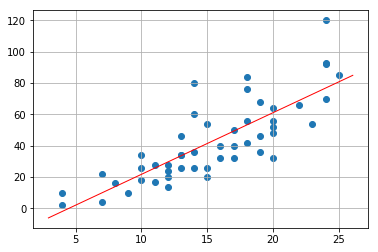

In [10]:
fig, ax = plt.subplots()
ax.scatter(x, y)
x1, x2 = ax.get_xlim()
y1, y2 = np.dot(theta, [1, x1]), np.dot(theta, [1, x2])
ax.plot([x1, x2], [y1, y2], linewidth=1, c='red')
ax.grid()

### Multivariate Linear Regression

This is linear regression with multiple predictor variables.

Model:
    
$y = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_3 \ldots + \theta_n x_n$

In [11]:
wine = pd.read_csv('winequality-red.csv', sep=';')

In [12]:
wine.shape

(1599, 12)

In [13]:
wine_train, wine_test = wine[:1200], wine[1200:]

In [14]:
x0 = np.ones((len(wine_train), 1)) # models the intercept
X = wine_train.drop('quality', axis=1).values

In [15]:
X = np.concatenate([x0, X], axis=1)

In [16]:
y = wine_train['quality'].values

In [17]:
theta = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X)), X.T), y)

In [18]:
theta

array([  4.26148353e+01,   4.68226978e-02,  -1.06858847e+00,
        -2.69078072e-01,   3.46373237e-02,  -1.60559854e+00,
         3.48715209e-03,  -3.77404055e-03,  -3.91307833e+01,
        -2.53835069e-01,   7.71874679e-01,   2.69457226e-01])

In [19]:
x0 = np.ones((len(wine_test), 1)) # models the intercept
x_test = wine_test.drop('quality', axis=1).values
X = np.concatenate([x0, x_test], axis=1)

In [20]:
expected = wine_test['quality']
predictions = np.matmul(X, theta)

In [31]:
pd.DataFrame({'expected': expected, 'predictions': predictions})[5:15]

,expected,predictions
1205,7,6.123699
1206,7,6.123699
1207,5,5.425015
1208,7,6.123699
1209,7,6.192969
1210,6,5.648277
1211,5,5.419992
1212,6,5.648277
1213,6,6.076723
1214,6,5.939480


We can see that the regression model doesn't do too badly on some of the records, though we would need a more formal way to measure this